In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input ,Conv2D ,MaxPooling2D ,UpSampling2D ,Reshape ,Flatten
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.optimizers import Adam

from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
#read images
def read_img(path):
    imgs = glob(path +"\\*.jpg")
    num = len(imgs)
    array_rgb = np.zeros([num , 64 , 64 ,3])
    array_gray = np.zeros([num , 64 , 64 ])
    
    i = 0
    for im in imgs:
        img = load_img(im , target_size=(64,64))
        img = img_to_array(img)
        img_gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)

        
        array_rgb[i :] =  img
        array_gray[i :] = img_gray
        i += 1
    
    return array_gray , array_rgb

path = r"C:\Users\Ugur\Desktop\renklendirme"
x_input , x_output = read_img(path)
#preprocessing
x_input = x_input.astype("float32") / 255.0
x_output = x_output.astype("float32") / 255.0

x_input = np.reshape(x_input , (len(x_input) , 64, 64 , 1))
x_output= np.reshape(x_output , (len(x_output) , 64, 64, 3))
print("X input shape :", x_input.shape)
#print("X output shape :", x_output.shape)

X input shape : (4, 64, 64, 1)


In [3]:
#encoder
encoder_img_input = Input(shape = (64 , 64 , 1))

x = Conv2D(32 ,(3,3), activation = "relu" , padding = "same")(encoder_img_input)
x = MaxPooling2D((2,2), padding = "same")(x) #32,32,128

x = Conv2D(64 ,(3,3), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2,2) ,padding = "same")(x) #16,16,64

x = Conv2D(128, (3,3) ,activation = "relu", padding = "same")(x)
x = MaxPooling2D((2,2), padding = "same")(x)#8,8,64

x = Conv2D(128 , (3,3) ,activation = "relu", padding = "same")(x) #8,8,32
x = MaxPooling2D((2,2), padding = "same")(x)#4,4,32

x = Flatten()(x)
x = Dense(4*4*16 , activation = "relu")(x)
encoded = Dense(4*4*4 , activation = "relu")(x) #latent space

encoder = Model(encoder_img_input, encoded , name = "encoder")

#decoder
x = Dense(4*4*16, activation = "relu")(encoded) 
x = Reshape((4,4,16) , input_shape = (4*4*16, ))(x)

x = UpSampling2D((2,2))(x) 
x = Conv2D(128 , (3,3) ,activation = "relu", padding = "same")(x) 

x = UpSampling2D((2,2))(x) 
x = Conv2D(128, (3,3) ,activation = "relu", padding = "same")(x)

x = UpSampling2D((2,2))(x) 
x = Conv2D(64 ,(3,3), activation = "relu", padding = "same")(x)

x = UpSampling2D((2,2))(x)
x = Conv2D(32 ,(3,3), activation = "relu" , padding = "same")(x)

decoded = Conv2D(3 ,(3,3), activation = "sigmoid" , padding = "same")(x)

#model
autoencoder = Model(encoder_img_input , decoded , name = "autoencoder")

In [4]:
#load weights
autoencoder.load_weights("autoencoderweights.h5")
encoder.load_weights("encoderweights.h5")

Input images


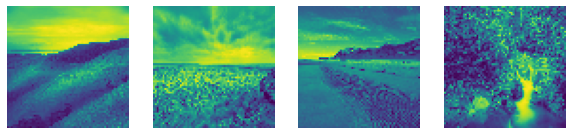

Precit images


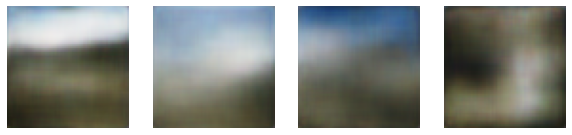

Real images


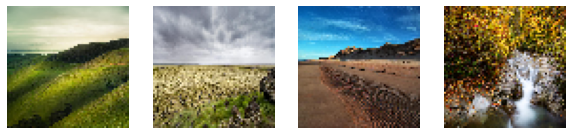

In [8]:
predecit = autoencoder.predict(x_input)
#visualize
print("Input images")
plt.figure(figsize = (10,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    plt.imshow(x_input[i])
    plt.axis("off")
plt.show()    
    
print("Precit images") 
plt.figure(figsize = (10,4))
for i in range(4):
    plt.subplot(1,4 ,i+1)
    plt.imshow(predecit[i])
    plt.axis("off")

plt.show()
print("Real images") 
plt.figure(figsize = (10,4))
for i in range(4):
    plt.subplot(1,4 ,i+1)
    plt.imshow(x_output[i])
    plt.axis("off")

plt.show()